In [1]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARMA, ARIMA
import itertools
import warnings
warnings.filterwarnings('ignore')
import math
from itertools import product
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance as yf
np.random.seed(12)

In [2]:
nike = yf.Ticker('NKE')

[*********************100%***********************]  1 of 1 completed


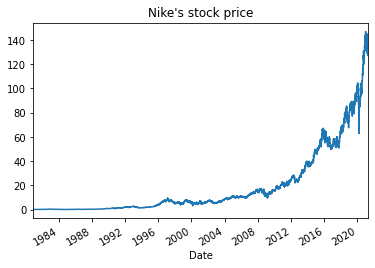

In [3]:
# downloading stock data so that we can put into df. above could not.
nike_df = yf.download('NKE')
nike_df['Close'].plot(title="Nike's stock price")

In [5]:
nike_df['year'] = nike_df.index.year
nike_df['month'] = nike_df.index.month
nike_df['day'] = nike_df.index.day

In [6]:
nike_df

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Date,,,,,,,,,
1980-12-02,0.1797,0.1836,0.1797,0.1797,0.1324,100710400,1980,12,2
1980-12-03,0.1777,0.1777,0.1758,0.1758,0.1295,25177600,1980,12,3
1980-12-04,0.1816,0.1836,0.1816,0.1816,0.1339,22694400,1980,12,4
1980-12-05,0.1758,0.1758,0.1719,0.1719,0.1267,7590400,1980,12,5
1980-12-08,0.1641,0.1641,0.1621,0.1621,0.1195,5414400,1980,12,8
...,...,...,...,...,...,...,...,...,...
2021-04-23,128.9300,130.6500,128.4600,130.1900,130.1900,7489000,2021,4,23
2021-04-26,130.4900,131.7000,129.3200,131.6000,131.6000,8217800,2021,4,26
2021-04-27,132.0000,132.7900,131.4100,132.1100,132.1100,5833100,2021,4,27


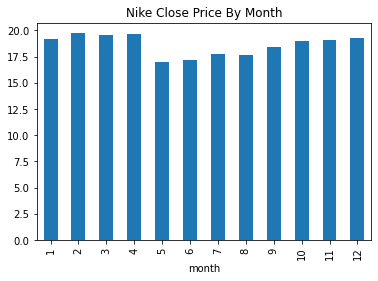

In [7]:
nike_df.groupby('month')['Close'].mean().plot.bar()
plt.title("Nike Close Price By Month")
plt.savefig('./images/Nike_rec1.png')
plt.show()

In [12]:
Nike_df = pd.DataFrame(nike_df['2010-01-01':])

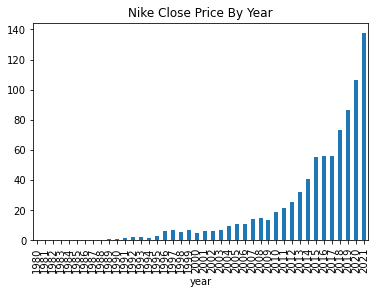

In [13]:
nike_df.groupby('year')['Close'].mean().plot.bar()
plt.title("Nike Close Price By Year")
plt.savefig('./images/Nike_rec3.png')
plt.show()

In [4]:
nike_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-02,0.1797,0.1836,0.1797,0.1797,0.1324,100710400
1980-12-03,0.1777,0.1777,0.1758,0.1758,0.1295,25177600
1980-12-04,0.1816,0.1836,0.1816,0.1816,0.1339,22694400
1980-12-05,0.1758,0.1758,0.1719,0.1719,0.1267,7590400
1980-12-08,0.1641,0.1641,0.1621,0.1621,0.1195,5414400
...,...,...,...,...,...,...
2021-04-23,128.9300,130.6500,128.4600,130.1900,130.1900,7489000
2021-04-26,130.4900,131.7000,129.3200,131.6000,131.6000,8217800
2021-04-27,132.0000,132.7900,131.4100,132.1100,132.1100,5833100


In [5]:
nike_df = pd.DataFrame(nike_df['Close'])

In [6]:
nike_df = nike_df['2010-01-01':'2019-12-31']

In [7]:
nike_df.describe()

,Close
count,2516.0000
mean,46.5157
std,21.9768
min,15.3250
25%,24.7806
50%,47.7125
75%,60.1475
max,101.5700


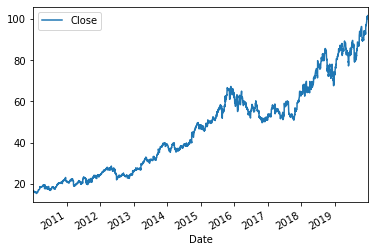

In [8]:
nike_df.plot()

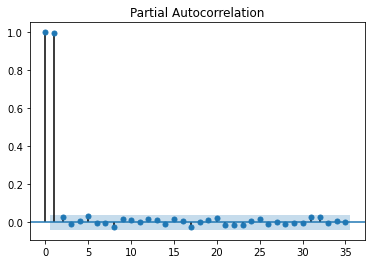

In [11]:
plot_pacf(nike_df['Close']);

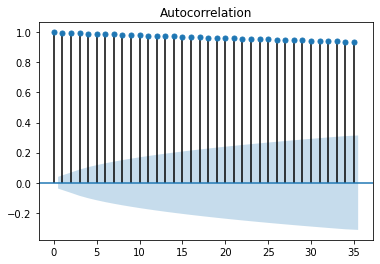

In [10]:
plot_acf(nike_df['Close']);

# Make Stationary

In [12]:
nike_df['data_tr_1'] = np.log(nike_df['Close'])

In [13]:
nike_df['data_tr_1'] = nike_df['data_tr_1'].diff()
nike_df.head()

,Close,data_tr_1
Date,,
2010-01-04,16.3375,nan
2010-01-05,16.4025,0.0040
2010-01-06,16.3025,-0.0061
2010-01-07,16.4625,0.0098
2010-01-08,16.4300,-0.0020


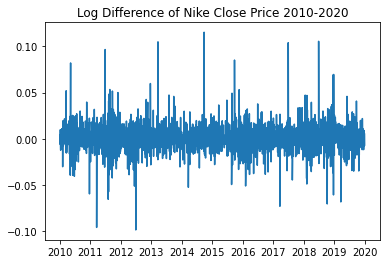

In [14]:
plt.plot(nike_df['data_tr_1'])
plt.title("Log Difference of Nike Close Price 2010-2020")
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def stationarity_check(TS):
    #calc rolling stats
    roll30_mean = TS.rolling(window=30, center=False).mean()
    roll30_std = TS.rolling(window=30, center=False).std()
    
    # perform dickey-fuller test
    dftest = adfuller(TS)
    
    # plot rolling stats
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue')
    plt.plot(roll30_mean, color='red', label='Rolling 30 Day Mean')
    plt.plot(roll30_std, color='black', label='Rolling 30 Day Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # print dickey-fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                            '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
        
    return None

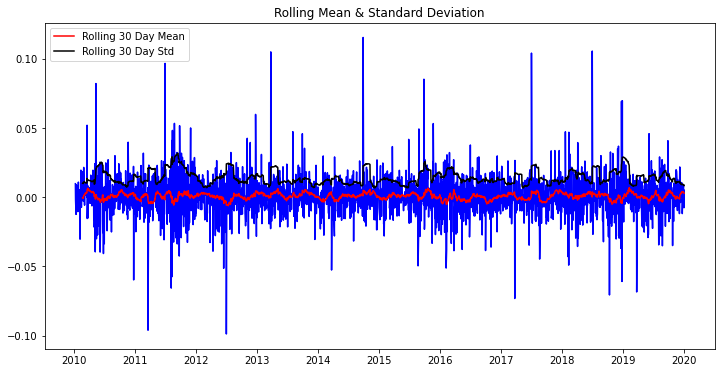

Results of Dickey-Fuller Test: 

Test Statistic                 -28.0353
p-value                          0.0000
#Lags Used                       3.0000
Number of Observations Used   2509.0000
Critical Value (1%)             -3.4330
dtype: float64
Test Statistic                 -28.0353
p-value                          0.0000
#Lags Used                       3.0000
Number of Observations Used   2509.0000
Critical Value (1%)             -3.4330
Critical Value (5%)             -2.8627
dtype: float64
Test Statistic                 -28.0353
p-value                          0.0000
#Lags Used                       3.0000
Number of Observations Used   2509.0000
Critical Value (1%)             -3.4330
Critical Value (5%)             -2.8627
Critical Value (10%)            -2.5674
dtype: float64


In [26]:
stationarity_check(nike_df['data_tr_1'])

In [18]:
nike_df['data_tr_2'] = nike_df['data_tr_1'][1:].diff(2)
nike_df.head(10)

,Close,data_tr_1,data_tr_2
Date,,,
2010-01-04,16.3375,nan,nan
2010-01-05,16.4025,0.0040,nan
2010-01-06,16.3025,-0.0061,nan
2010-01-07,16.4625,0.0098,0.0058
2010-01-08,16.4300,-0.0020,0.0041
2010-01-11,16.2275,-0.0124,-0.0222
2010-01-12,16.2050,-0.0014,0.0006
2010-01-13,16.3500,0.0089,0.0213
2010-01-14,16.2475,-0.0063,-0.0049


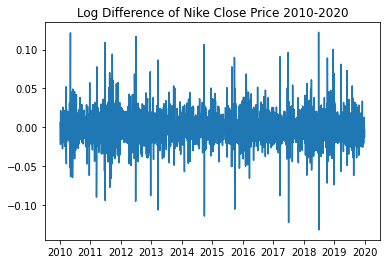

In [19]:
plt.plot(nike_df['data_tr_2'])
plt.title("Log Difference of Nike Close Price 2010-2020")
plt.show()

In [20]:
nike_df.dropna(inplace=True)

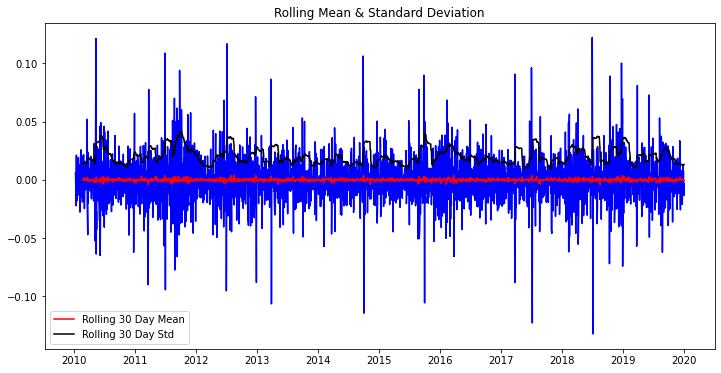

Results of Dickey-Fuller Test: 

Test Statistic                 -16.4705
p-value                          0.0000
#Lags Used                      25.0000
Number of Observations Used   2487.0000
Critical Value (1%)             -3.4330
dtype: float64
Test Statistic                 -16.4705
p-value                          0.0000
#Lags Used                      25.0000
Number of Observations Used   2487.0000
Critical Value (1%)             -3.4330
Critical Value (5%)             -2.8627
dtype: float64
Test Statistic                 -16.4705
p-value                          0.0000
#Lags Used                      25.0000
Number of Observations Used   2487.0000
Critical Value (1%)             -3.4330
Critical Value (5%)             -2.8627
Critical Value (10%)            -2.5674
dtype: float64


In [21]:
stationarity_check(nike_df['data_tr_2'])

At this point we have log transformed the 10yrs of data, took the rolling mean on a 30-day basis and subtracted that difference from the original data point. 
This results in the data now being stationary! 

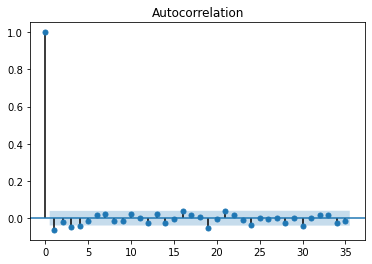

In [27]:
plot_acf(nike_df['data_tr_1']);

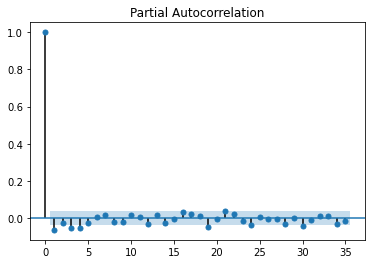

In [28]:
plot_pacf(nike_df['data_tr_1']);

# Find Best pdq

In [29]:
def optimize_SARIMA(endog, parameters_list, d, D, s):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        endog - the observed variable
    """
    
    results = []
    
    for param in parameters_list:
        try: 
            model = SARIMAX(endog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [30]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:15])

256
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3), (0, 0, 2, 0), (0, 0, 2, 1), (0, 0, 2, 2), (0, 0, 2, 3), (0, 0, 3, 0), (0, 0, 3, 1), (0, 0, 3, 2)]


In [32]:
nike_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2010-01-07 to 2019-12-31
Data columns (total 3 columns):
Close        2513 non-null float64
data_tr_1    2513 non-null float64
data_tr_2    2513 non-null float64
dtypes: float64(3)
memory usage: 78.5 KB


In [33]:
result_df = optimize_SARIMA(nike_df['Close'], parameters_list, 1, 1, 4)
result_df

,"(p,q)x(P,Q)",AIC
0,"(0, 1, 3, 2)",5707.1082
1,"(1, 0, 3, 2)",5707.4907
2,"(0, 1, 3, 1)",5708.3384
3,"(2, 0, 3, 2)",5708.5640
4,"(0, 2, 3, 2)",5708.5710
...,...,...
251,"(0, 1, 0, 0)",7648.9454
252,"(1, 0, 0, 0)",7649.1480
253,"(2, 0, 0, 0)",7650.8913
254,"(3, 0, 0, 0)",7651.3180


# Modeling

In [34]:
best_model = SARIMAX(nike_df['Close'], order=(0,1,1), seasonal_order=(3,1,2,4), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                  Close   No. Observations:                 2513
Model:             SARIMAX(0, 1, 1)x(3, 1, [1, 2], 4)   Log Likelihood               -2846.554
Date:                                Thu, 29 Apr 2021   AIC                           5707.108
Time:                                        13:29:03   BIC                           5747.899
Sample:                                             0   HQIC                          5721.915
                                               - 2513                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0680      0.013     -5.133      0.000      -0.094      -0.042
ar.

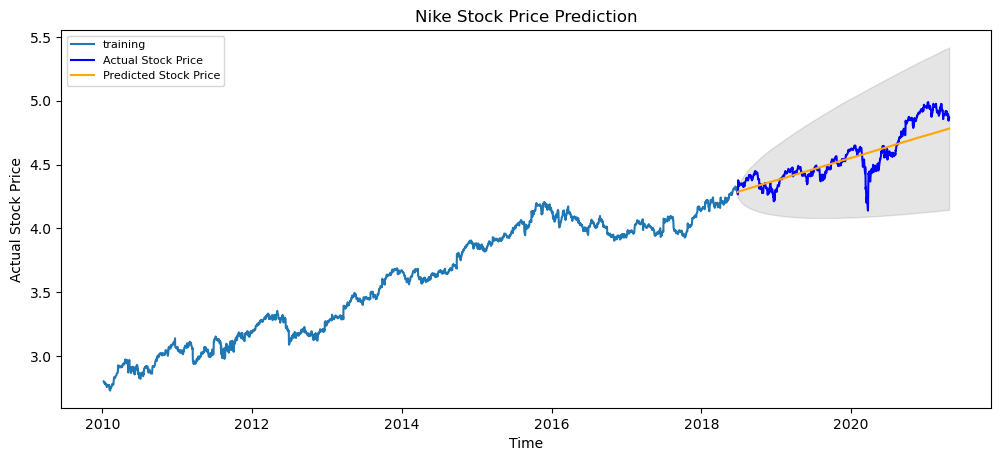

In [29]:
# Forecast
fc, se, conf = fitted.forecast(712, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Nike Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('./images/Nike_predicted_graph.png')
plt.show()

# Model Evaluation:

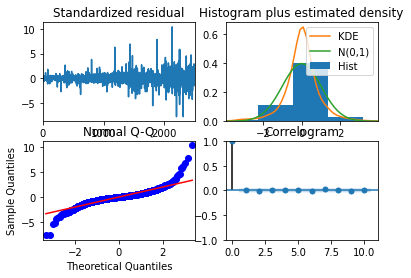

In [35]:
res.plot_diagnostics();

In [20]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
# mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
# print('MAPE: '+str(mape))

MSE: 0.011578517816515836
MAE: 0.08213931481026471
RMSE: 0.1076035213945893


# Conclusion

Stock data is some of the most unpredictable data there is, which did not lend itself well to this being my first time series project.

With that said, I was able to identify the best parameters for modeling, fit to that model, and conclude that assumptions did hold throughout the model as you can see in the evaluation where the residuals mean held constant at 0 and normally distributed, as well as a strong MSE score of 0.0113.

Thank you!